# Introduction


This dataset include data information about GPU Stock Price. The dataset include 7 columns which include **Date,Open Price,Low Price,High Price,Close Price, Adujusted Close Price, Volume of of stock share trades on that date**. It's important to become familiar with each attributes that are assocaited with Stocks in general. Then, we can study about GPU(Graphical Processing Unit) to gain some more insight so we could put everything in a more clear context before diving in for a hypothesis. 

## Stock Terminology:

**Open Stock Price**:
The opening price is the price at which a security first trades upon the opening of an exchange on a trading day. The opening price is not close the close price of previous date. Corporate announcements or other news events that occur after the market closes can change investor expectations and an **opening price**. Large-scale natural disasters or man-made disasters, such as wars or terrorist attacks that occur in after-hours, may have similar effects on stock prices. When these events occur, some investors may try to buy or sell securities during the after-hours. There are many different strategies that traders use for opening prices such as "Gap Fade and Fill" and "fade".

**Low Price**:
A penny stock typically refers to the stock of a small company that trades for less than $5 per share. Penny stocks are usually associated with small companies with a lack of liquidity, meaning that there are few ready buyers in the marketplace


**High Price**:
It is represented by the highest point on a day's stock chart.For example, if today's low is $25 and the previous day's high is $20, there would be a gap. The identification of a gap, along with other market signals such as changes in trading volume and overall bullish or bearish sentiment, helps market analysts generate buy and sell signals for particular stocks.



**Close Price**:
"Closing price" is the raw price, which is just the cash value of the last transacted price before the market closes. For many U.S. markets, regular trading sessions run from 9:30 a.m. to 4:00 p.m. Eastern Time.


**Adjustable Close Price":**
 The adjusted closing price factors in anything that might affect the stock price after the market closes. A stock's price is typically affected by supply and demand of market participants. However, some corporate actions, such as stock splits, dividends, and rights offerings, affect a stock's price.
             
- **stock splits**: 
  A stock split happens when a company increases the number of its shares to boost the stock's liquidity.In other words, every share held before the split, each stockholder will have two or three shares, respectively, after the split. So if you have 1 share after the stock split you have 2 shares.Most common splits are  2-for-1 or 3-for-1. Companies often choose to split their stock to lower its trading price to a more comfortable range for most investors and to increase the liquidity of trading in its shares.
             
- **sotck dividends:** 
  A dividend is the distribution of a company's earnings to its shareholders and is determined by the company's board of directors. Dividends are often distributed quarterly and may be paid out as cash or in the form of reinvestment in additional stock.
  
- **rights offerings**:
 A rights offering (rights issue) is a group of rights offered to existing shareholders to purchase additional stock shares. If you are a shareholder usaully there will be benefits for you to buy more of the same share at a discounted price. 
 

### Hypothesis:

- Null Hypothesis (H0): There is no significant relationship between price volatility (measured as the range between High and Low prices) and the given attributes (Open, High, Low, Volume) in the dataset.

- Alternative Hypothesis (H1): Price volatility is influenced by one or more of the given attributes (Open, High, Low, Volume) in the dataset, indicating a significant relationship.





## Resources: 
https://www.investopedia.com/terms/a/adjusted_closing_price.asp



In [1]:
import pandas as pd
import numpy as np
import missingno as msno



df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/Data-Analysis-Personal-Projects/main/GPUStockPrice/Intel%20(1980-2023).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.184470,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188933,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.188189,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.181494,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177775,8966400


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10859 non-null  object 
 1   Open       10859 non-null  float64
 2   High       10859 non-null  float64
 3   Low        10859 non-null  float64
 4   Close      10859 non-null  float64
 5   Adj Close  10859 non-null  float64
 6   Volume     10859 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 594.0+ KB


**6 of the attributes are float data type and 1 is string type(object).**

In [3]:
df.shape

(10859, 7)

**There are 10859 rows and 7 columns.**

## Descriptive Statistics

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10859.000000,10859.000000,10859.000000,10859.000000,10859.000000,1.085900e+04
mean,19.834106,20.105102,19.565597,19.833531,14.636382,5.056303e+07
std,17.514871,17.756945,17.278878,17.514300,14.829796,3.487815e+07
min,0.218750,0.218750,0.216146,0.216146,0.123476,0.000000e+00
25%,1.328125,1.343750,1.304688,1.328125,0.758707,2.708505e+07
50%,20.277344,20.562500,20.010000,20.280001,12.665797,4.460160e+07
75%,29.980000,30.425000,29.520000,29.950001,19.808317,6.477205e+07
max,75.625000,75.828125,73.625000,74.875000,63.608189,5.677088e+08


## Insight on the Statistics

Upon careful examination of the provided table, an intriguing revelation emerges: an extraordinary minimum value of 0.218750 pervades all types of prices. Remarkably, at this specific price point, the traded volume plummets to an unprecedented 0. Such a remarkable occurrence is exceedingly rare within the dynamic landscape of the stock market. In the event that this peculiar pattern recurs on multiple occasions, it becomes absolutely essential to embark on a thorough investigation to uncover the underlying causes behind these peculiar instances of illiquid stocks.

- Side Note: Illiquid stocks refer to those with limited trading volume and extremely low prices. They often signify highly speculative investments. In our endeavor to analyze the dataset, we will dedicate ourselves to exploring the mentioned scenarios to the best of our abilities.

Another noteworthy aspect that deserves our attention is the impressive value range found in the volume column, extending from 0 to a staggering 5.6 x 10^8.Even though this range makes sense for the values which indicate the stock volume traded in a day but this range exceeds the other values present in the table by a considerable margin. Therefore, it becomes important to carefully normalize this range to ensure a smoother visualization and analysis experience. By employing appropriate normalization techniques, we can create a friendlier and more user-friendly presentation of the data, enabling us to derive more accurate and insightful analysis.




Resource: https://www.indmoney.com/articles/stocks/what-makes-a-stock-illiquid-let-s-find-out

## Normalization of volume values-MaxMin

In [ ]:
min_value = df['Volume'].min()
max_value=df['Volume'].max()
normalized_values=(df['Volume']-min_value)/(max_value - min_value)
normalized_values=normalized_values+1
df['Volume']=normalized_values
df.corr()

### Elaboration on normalization technique:

**MinMax technique normalize the data where we will have a range between 0-1. However, since 0 is not an accetable range in the context of stock for the volume attribute, addition of 1 is done(normalized_values=normalized_values+1), to make the the range from 1-2.**

# Missing Values

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Missing-Values Matrix

<AxesSubplot:>

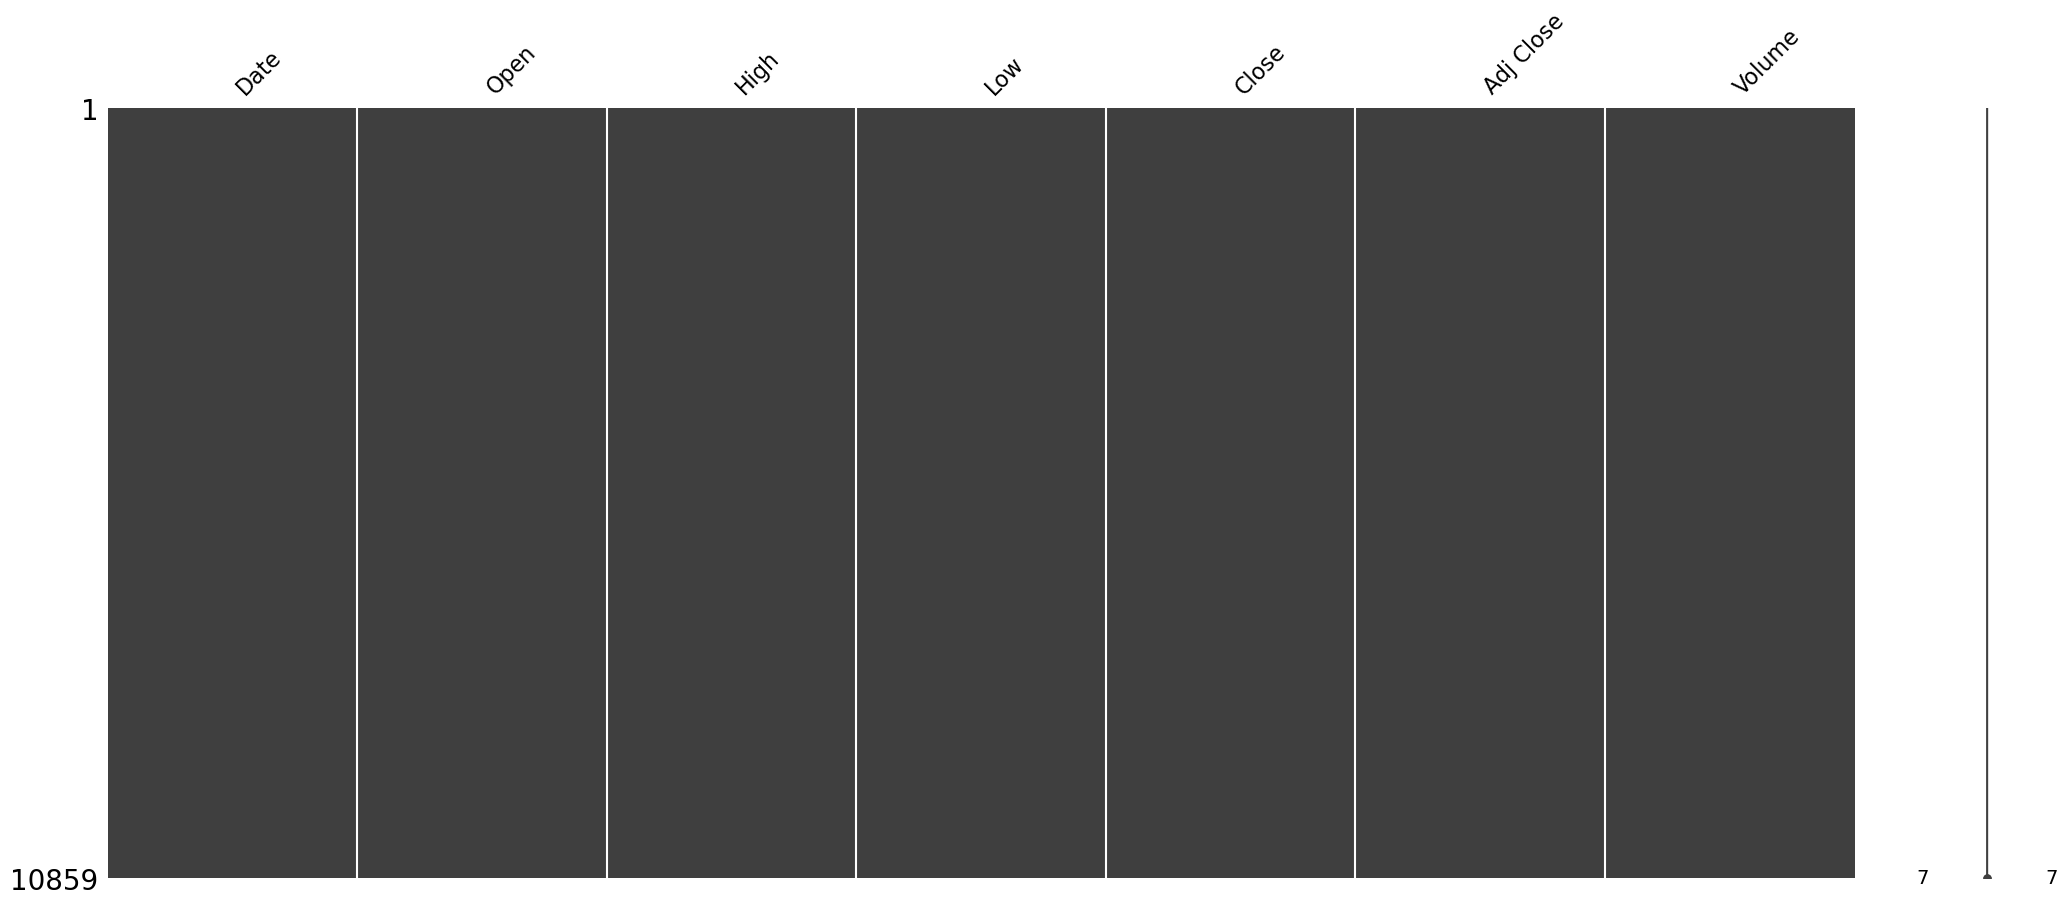

In [8]:
msno.matrix(df)

# Data Anamoly

**There are different ways to investigate for data anamolies in a dataset. Data anamolies are data outliers that exist in the dataset. The presence of outliers in a stock dataset is an important factor to investigate because outliers are important as they will highlight securities behaving unexpectedly due to a number of possible factors, including poor liquidity, sudden volatility, unreliable data or regulatory changes.**

1. **Standard Deviation**
2. **Boxplot**

## Box Plot

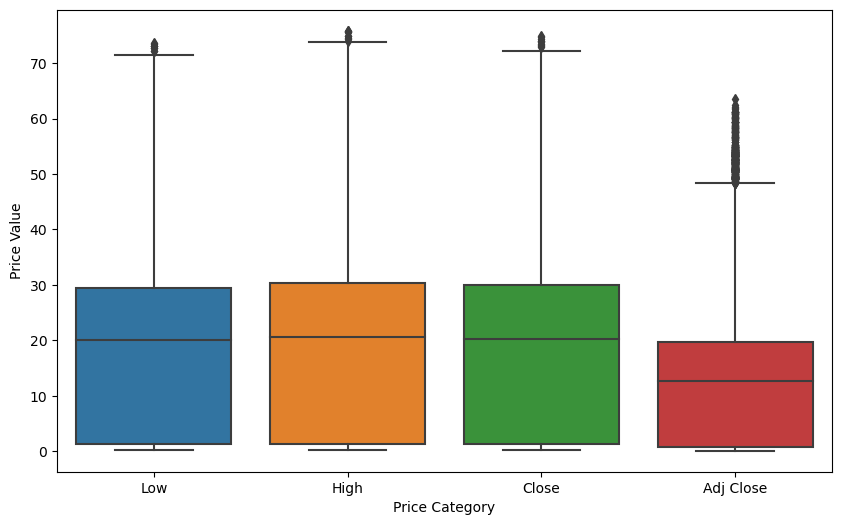

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
data1 = pd.DataFrame({'Price Category': ['Low'] * len(df), 'Price Value': df['Low']})
data2= pd.DataFrame({'Price Category': ['High'] * len(df), 'Price Value': df['High']})
data3= pd.DataFrame({'Price Category': ['Close'] * len(df), 'Price Value': df['Close']})
data4= pd.DataFrame({'Price Category': ['Adj Close'] * len(df), 'Price Value': df['Adj Close']})

data = pd.concat([data1, data2,data3,data4])
sns.boxplot(data=data, x='Price Category', y='Price Value')
plt.show()

**Inspecting the above boxplot, we see the following fact that is worth mentioning:**

- Same Median for all Low,High,Close prices
- Same distribution of the data for Low,High,Close prices
- More outliers for Adjust Closing Price

## Checking for linearity of the data

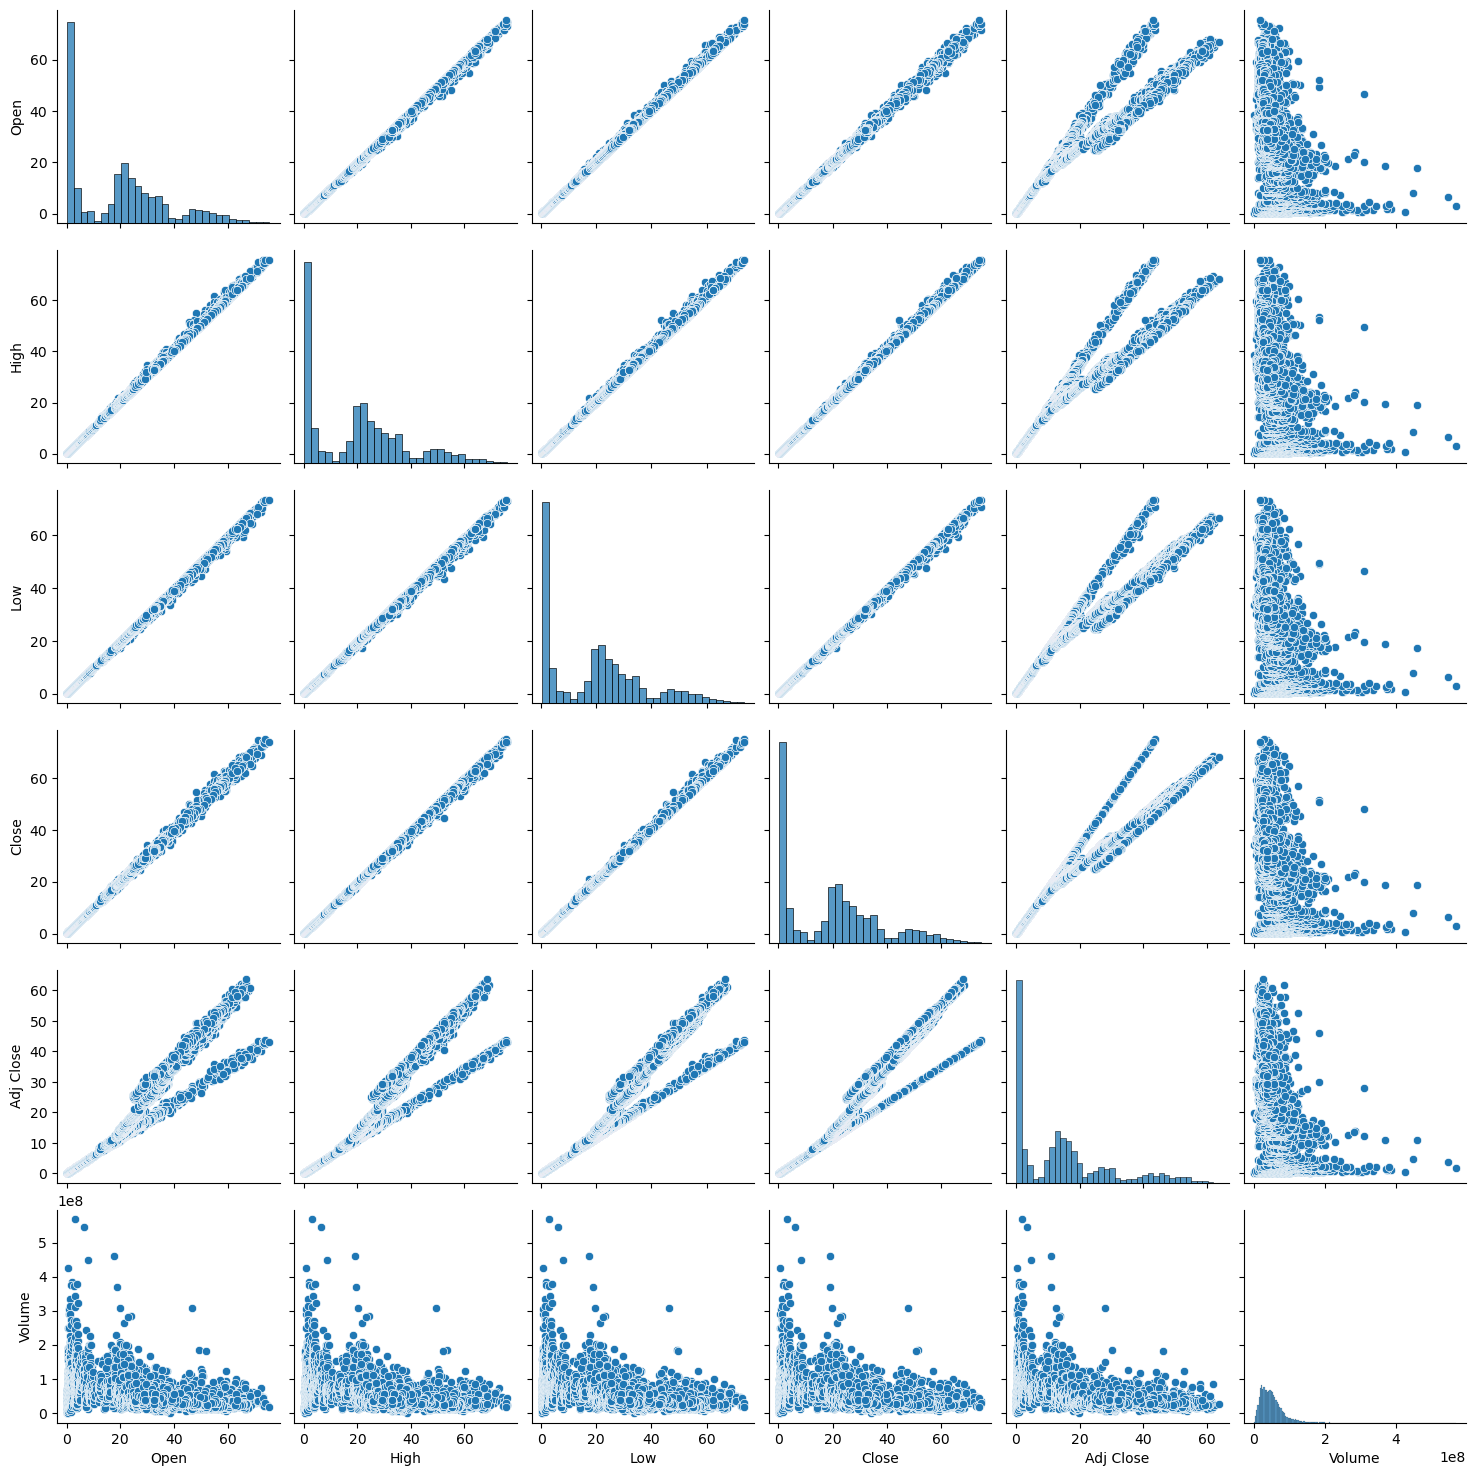

In [10]:
sns.pairplot(df)

**Looking at the relationship between the independent variables(open,high,low,close,Adj Close) and dependent variable (Volatility) , we see non linear relationship. This would suggest that linear regression model might not be the best model to make prediction about the volatility.**

## Dropping the Date Column & Adding Year,Month,Day Column

In [15]:
date_column=df['Date']




def date_util(column):
    year_part=list()
    month_part=list()
    day_part=list()
    for i in column:
        year=i[0:4]
        month=i[5:7]
        day=i[8:10]
        year_part.append(year)
        month_part.append(month)
        day_part.append(day)        
    return year_part,month_part,day_part




y,m,d=date_util(date_column)
df['Year']=pd.DataFrame({"Year":y})
df['Month']=pd.DataFrame({"Month": m})
df['Day']=pd.DataFrame({"Day": d})



df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

df.drop(['Date'],axis=1,inplace=True)
df



,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,0.325521,0.328125,0.322917,0.322917,0.184470,17068800,1980,3,18
1,0.330729,0.335938,0.330729,0.330729,0.188933,18508800,1980,3,19
2,0.330729,0.334635,0.329427,0.329427,0.188189,11174400,1980,3,20
3,0.322917,0.322917,0.317708,0.317708,0.181494,12172800,1980,3,21
4,0.316406,0.316406,0.311198,0.311198,0.177775,8966400,1980,3,24
...,...,...,...,...,...,...,...,...,...
10854,32.799999,32.990002,32.340000,32.830002,32.830002,39615700,2023,4,5
10855,32.599998,33.000000,32.459999,32.810001,32.810001,28551900,2023,4,6
10856,32.599998,32.759998,32.200001,32.520000,32.520000,30534400,2023,4,10
10857,32.660000,33.110001,32.320000,32.349998,32.349998,27059100,2023,4,11


## 'Price Volatility'

### What is Price Volatility ?

**Volatility represents how large an asset's prices swing around the mean price—it is a statistical measure of its dispersion of returns.**


**Interpretation Of The Attribute:**

`

In [16]:
import math
df_copy=df # shallow copy
closing_mean=df['Close'].mean()
df_copy['Mean_Difference']=df_copy['Close']-closing_mean
df_copy['Squared-Difference']=df_copy['Mean_Difference']**2
df['Volatility'] = df['Squared-Difference'].apply(lambda x: math.sqrt(x))

sum_squared=df_copy['Squared-Difference'].sum()
row,column=df_copy.shape
price_volatitlity=sum_squared/row
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Mean_Difference,Squared-Difference,Volatility
0,0.325521,0.328125,0.322917,0.322917,0.184470,17068800,1980,3,18,-19.510614,380.664055,19.510614
1,0.330729,0.335938,0.330729,0.330729,0.188933,18508800,1980,3,19,-19.502802,380.359282,19.502802
2,0.330729,0.334635,0.329427,0.329427,0.188189,11174400,1980,3,20,-19.504104,380.410069,19.504104
3,0.322917,0.322917,0.317708,0.317708,0.181494,12172800,1980,3,21,-19.515823,380.867344,19.515823
4,0.316406,0.316406,0.311198,0.311198,0.177775,8966400,1980,3,24,-19.522333,381.121482,19.522333
...,...,...,...,...,...,...,...,...,...,...,...,...
10854,32.799999,32.990002,32.340000,32.830002,32.830002,39615700,2023,4,5,12.996471,168.908261,12.996471
10855,32.599998,33.000000,32.459999,32.810001,32.810001,28551900,2023,4,6,12.976470,168.388776,12.976470
10856,32.599998,32.759998,32.200001,32.520000,32.520000,30534400,2023,4,10,12.686469,160.946498,12.686469
10857,32.660000,33.110001,32.320000,32.349998,32.349998,27059100,2023,4,11,12.516467,156.661948,12.516467


In [ ]:
print("Price Volatitlity: ",price_volatitlity)

### Correlation Table

### A step closer to Intel Stock fluctuation over the last 4 decades

<AxesSubplot:xlabel='Year', ylabel='Adj Close'>

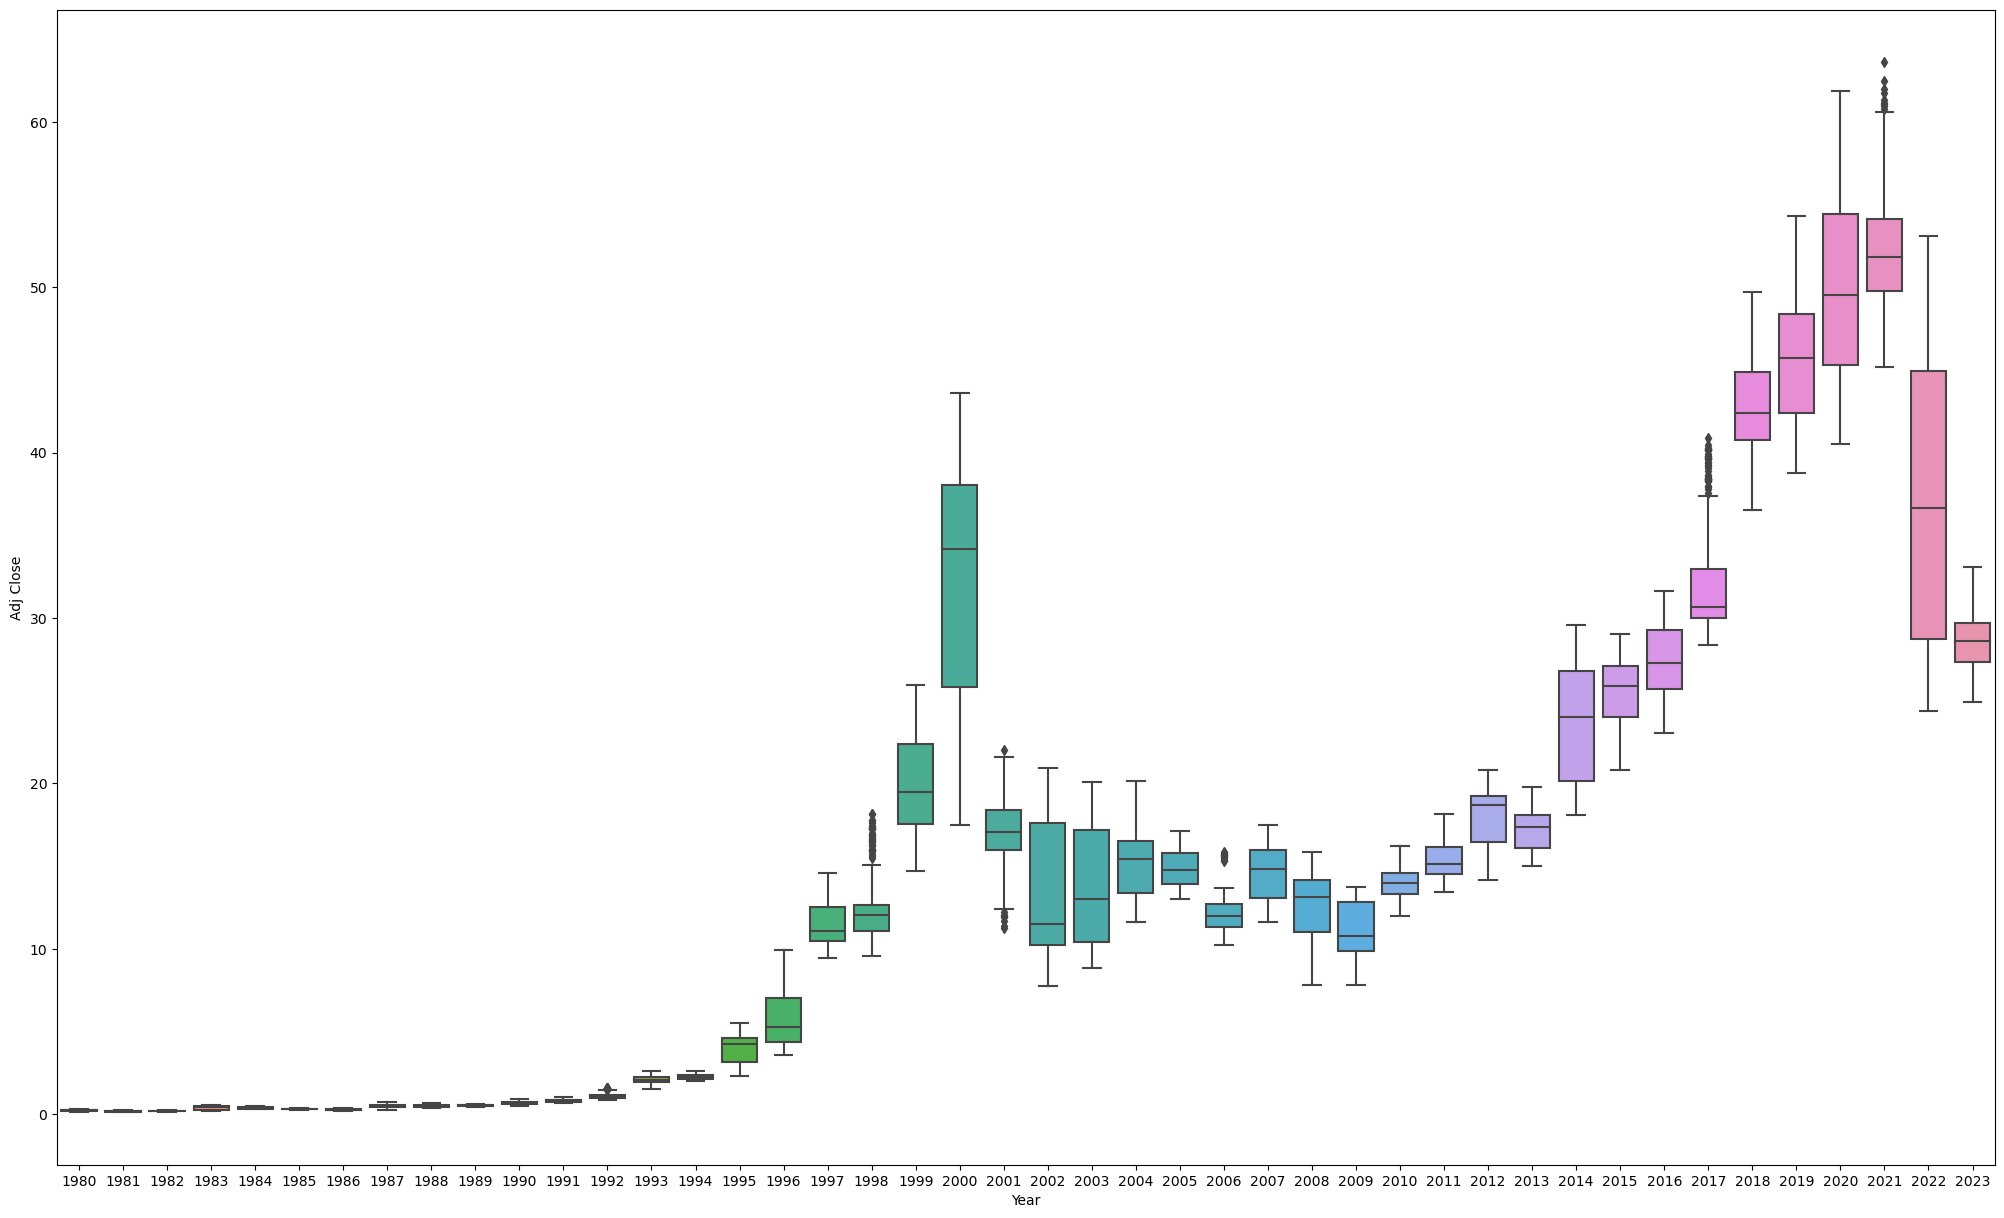

In [17]:
plt.figure(figsize=(25,15))
sns.boxplot(x=df['Year'],y=df['Adj Close'])

## Fluctuation in Intel Stock adjust closed price

**From the above boxplots we see 2 years,2000 and 2022, that have larger range in prices. Such promiment differences could have many difference reasons such as the "Dot-Com Bubble" which happened in the late 2000s. Furthermore, the above graph confirms the increase of adjust closing price overs the 43 years.**

### What is Dot-Com Bubble?

**The dot-com bubble was a period during which rampant speculation and bullish investment led to the overvaluation (and subsequent crash) of the young internet technology industry on Wall Street.**

### Intel stock tumbles after brutal results in 2022

**It is clear that the stock price fluctuated a lot as the boxplot on 2022 shows in the above graph. According to CNBC, "Intel shares closed down 6.4% on Friday, a day after the company reported dismal quarterly and full-year 2022 results."**



## Correlation Analysis

In [13]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999792,0.999791,0.999572,0.967286,-0.161830
High,0.999792,1.000000,0.999676,0.999771,0.966336,-0.158742
Low,0.999791,0.999676,1.000000,0.999789,0.968578,-0.165315
Close,0.999572,0.999771,0.999789,1.000000,0.967787,-0.162119
Adj Close,0.967286,0.966336,0.968578,0.967787,1.000000,-0.221884
Volume,-0.161830,-0.158742,-0.165315,-0.162119,-0.221884,1.000000


# Model Development

## Model 1 - Multiple Linear Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


feature_selection = ['Open', 'Adj Close', 'Close', 'Low']
X = df[feature_selection]
y = df['Volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
print(intercept)

[ 3.36447964  1.30441962  3.0788185  -7.43910138]
12.942199492862347


## Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
# print(y_pred)
# print(y_train)
# print(X_train)


# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
# Print the evaluation metrics
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared Score: ", r2)


Mean Squared Error (MSE):  74.64352926401037
Root Mean Squared Error (RMSE):  8.639648677117048
R-squared Score:  0.27489831225218475


## Normality Assumption Checks

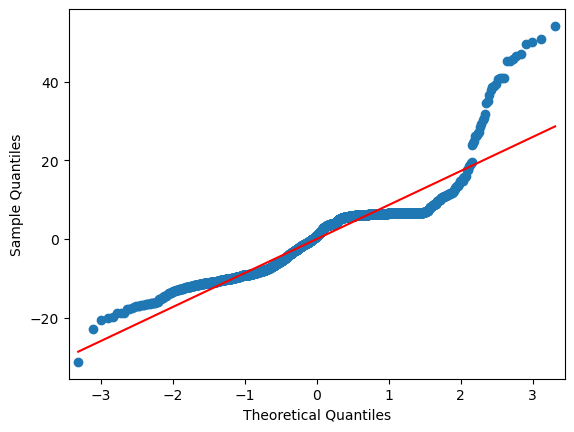

In [26]:
residuals = y_test - y_pred
qq = sm.ProbPlot(residuals)
qq.qqplot(line='s')
plt.show()

**Normality assumption fails in linear regression, it indicates that the errors or residuals of the model do not follow a normal distribution. In other words,the residuals are not normally distributed.**

**This can have implications for the reliability and validity of the linear regression model.**

## Histogram of residuals

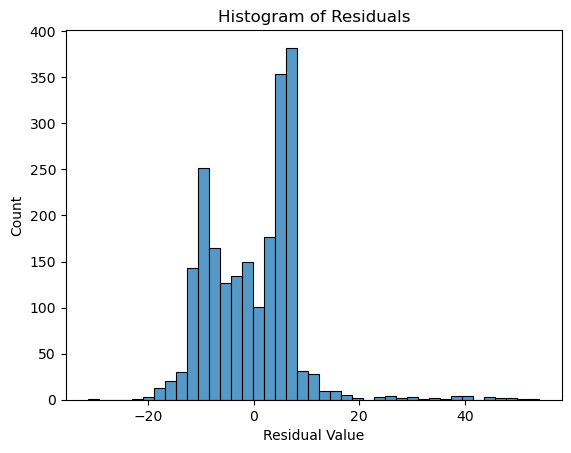

In [27]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()